In [1]:
# Step 1 — Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Step 2 — Loading and Splitting the Dataset
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [3]:
# Step 3 — Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Step 4 — Creating and Training the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), random_state=42, max_iter=500)
mlp.fit(X_train_scaled, y_train)

C:\Users\engrm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500, random_state=42)

In [5]:
# Step 5 — Making Predictions and Evaluating the Model
y_pred = mlp.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [6]:
# Step 6 — Displaying the MLP Structure and Training Information
print("Number of layers:", mlp.n_layers_)
print("Number of outputs:", mlp.n_outputs_)
print("Activation function:", mlp.activation)
print("Number of epochs:", mlp.n_iter_)

Number of layers: 4
Number of outputs: 3
Activation function: relu
Number of epochs: 500


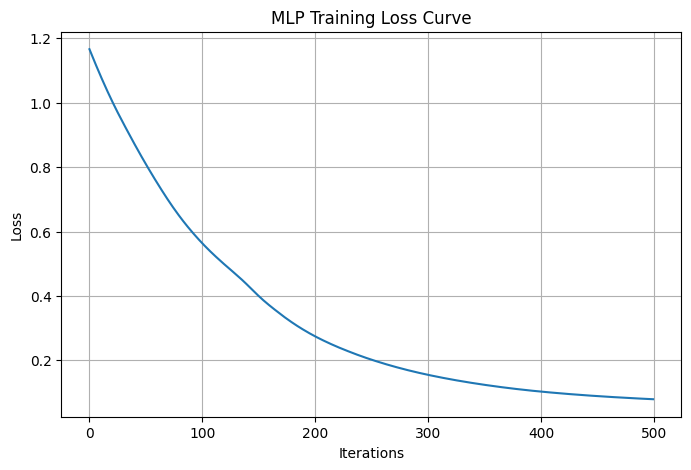

In [7]:
# Step 7 — Visualizing the Learning Curve (Loss Curve)
plt.figure(figsize=(8, 5))
plt.plot(mlp.loss_curve_)
plt.title("MLP Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

Task 1: Different Hidden Layers & Neurons

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [9]:
# Load and prepare data
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\engrm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\engrm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\engrm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\engrm\A

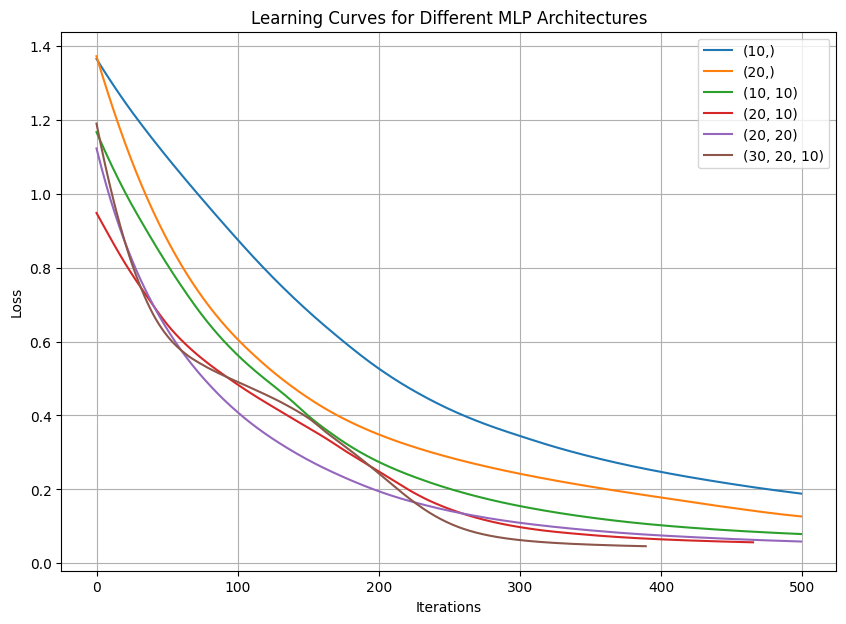

In [10]:
# Different model configurations
architectures = [
    (10,),
    (20,),
    (10, 10),
    (20, 10),
    (20, 20),
    (30, 20, 10)
]

results = {}

plt.figure(figsize=(10, 7))

for arch in architectures:
    mlp = MLPClassifier(hidden_layer_sizes=arch, random_state=42, max_iter=500)
    mlp.fit(X_train_scaled, y_train)

    y_pred = mlp.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[arch] = acc

    plt.plot(mlp.loss_curve_, label=str(arch))

plt.title("Learning Curves for Different MLP Architectures")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Print accuracy results
print("Accuracy for each architecture:")
for arch, acc in results.items():
    print(f"{arch}: {acc:.4f}")

Accuracy for each architecture:
(10,): 1.0000
(20,): 1.0000
(10, 10): 0.9667
(20, 10): 1.0000
(20, 20): 1.0000
(30, 20, 10): 1.0000


Task 2: Changing Learning Rate

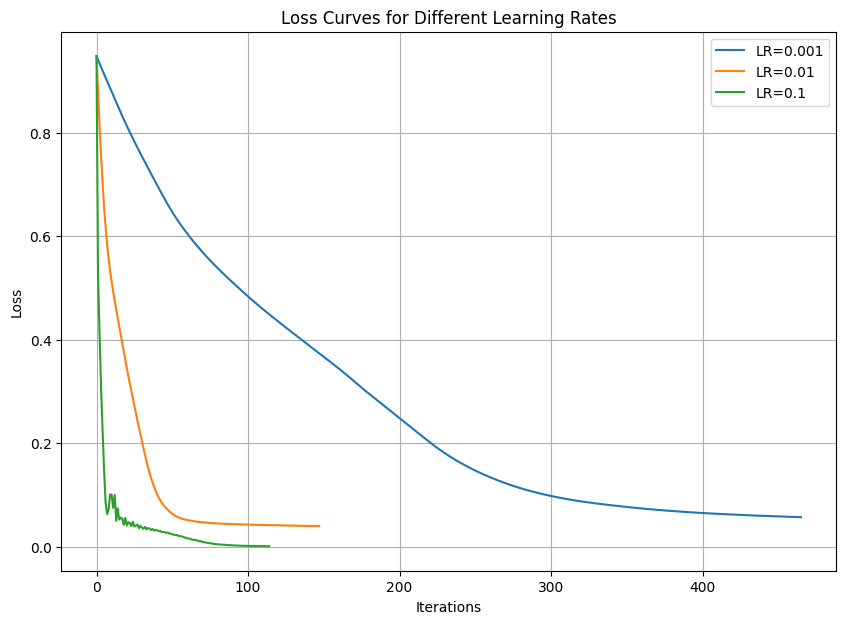

In [12]:
learning_rates = [0.001, 0.01, 0.1]
results_lr = {}

plt.figure(figsize=(10, 7))

for lr in learning_rates:
    mlp = MLPClassifier(
        hidden_layer_sizes=(20, 10),
        learning_rate_init=lr,
        random_state=42,
        max_iter=500
    )
    mlp.fit(X_train_scaled, y_train)

    y_pred = mlp.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results_lr[lr] = acc

    plt.plot(mlp.loss_curve_, label=f"LR={lr}")

plt.title("Loss Curves for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Print learning rate results
print("Accuracy for each learning rate:")
for lr, acc in results_lr.items():
    print(f"Learning rate {lr}: {acc:.4f}")

Accuracy for each learning rate:
Learning rate 0.001: 1.0000
Learning rate 0.01: 1.0000
Learning rate 0.1: 0.9667
